# Road Fatalities Analysis in Ireland

### Loading and Initial Exploration of Datasets 

- Importing necessary libraries and loading datasets.

In [218]:
import pandas as pd

# Load the datasets using pandas dataframes

# Includes annual road fatalities with a breakdown by month (2000 - 2023 September)
road_fatalities_monthly = pd.read_csv("Datasets/ROA11.20231122T121139.csv")

# Contains most up-to-date monthly road fatalities in Ireland (2000 January - 2023 October)
current_road_fatalities_monthly = pd.read_csv("Datasets/ROA29.20231122T121128.csv")

- Displaying the first few rows for an initial look at both datasets.

In [219]:
road_fatalities_monthly.head()

,STATISTIC Label,Year,Month of Fatality,UNIT,VALUE
0,Road Fatalities,2000,All months,Number,415.0
1,Road Fatalities,2000,January,Number,32.0
2,Road Fatalities,2000,February,Number,41.0
3,Road Fatalities,2000,March,Number,23.0
4,Road Fatalities,2000,April,Number,42.0


In [220]:
current_road_fatalities_monthly.head()

,Statistic Label,Month,Ireland,UNIT,VALUE
0,Road Fatalities,2000 January,Ireland,Number,32
1,Road Fatalities,2000 February,Ireland,Number,41
2,Road Fatalities,2000 March,Ireland,Number,23
3,Road Fatalities,2000 April,Ireland,Number,42
4,Road Fatalities,2000 May,Ireland,Number,29


### Data Inspection and Cleaning

- Examining dataset sizes, null values, and data types.

In [221]:
total_rows_road_fatalities_monthly = road_fatalities_monthly.shape[0] # = 312
total_rows_current_road_fatalities_monthly = current_road_fatalities_monthly.shape[0] # = 286

In [222]:
# Checking for null values and data types in the road_fatalities_monthly dataset
print("Null Values:\n", road_fatalities_monthly.isnull().sum())
print("Data Types:\n", road_fatalities_monthly.dtypes)


Null Values:
 STATISTIC Label      0
Year                 0
Month of Fatality    0
UNIT                 0
VALUE                3
dtype: int64
Data Types:
 STATISTIC Label       object
Year                   int64
Month of Fatality     object
UNIT                  object
VALUE                float64
dtype: object


In [223]:
# Checking for null values and data types in the current_road_fatalities_monthly dataset
print("Null Values:\n", current_road_fatalities_monthly.isnull().sum())
print("Data Types:\n", current_road_fatalities_monthly.dtypes)

Null Values:
 Statistic Label    0
Month              0
Ireland            0
UNIT               0
VALUE              0
dtype: int64
Data Types:
 Statistic Label    object
Month              object
Ireland            object
UNIT               object
VALUE               int64
dtype: object


- Cleaning data by addressing missing values and refining column names.

In [224]:
# Adding the value 22 to the row where Year = 2023 and Month of Fatality = October
road_fatalities_monthly.loc[(road_fatalities_monthly['Year'] == 2023) & 
                            (road_fatalities_monthly['Month of Fatality'] == 'October'), 'VALUE'] = 22

# Removing any remaining rows with null/missing values in 'road_fatalities_monthly'
road_fatalities_monthly.dropna(inplace=True)
road_fatalities_monthly

,STATISTIC Label,Year,Month of Fatality,UNIT,VALUE
0,Road Fatalities,2000,All months,Number,415.0
1,Road Fatalities,2000,January,Number,32.0
2,Road Fatalities,2000,February,Number,41.0
3,Road Fatalities,2000,March,Number,23.0
4,Road Fatalities,2000,April,Number,42.0
5,Road Fatalities,2000,May,Number,29.0
6,Road Fatalities,2000,June,Number,30.0
7,Road Fatalities,2000,July,Number,39.0
8,Road Fatalities,2000,August,Number,32.0
9,Road Fatalities,2000,September,Number,39.0


In [225]:
road_fatalities_monthly.rename(columns={'VALUE': 'Road Fatality Count'}, inplace=True)
road_fatalities_monthly.drop(columns=['UNIT', 'STATISTIC Label'], inplace=True)
   
current_road_fatalities_monthly.rename(columns={'VALUE': 'Road Fatality Count'}, inplace=True)
current_road_fatalities_monthly.drop(columns=['UNIT', 'Statistic Label', 'Ireland'], inplace=True)

### Data Transformation and Preprocessing

- Splitting 'Month' column and converting data types for analysis.

In [226]:
current_road_fatalities_monthly[['Year', 'Month']] = current_road_fatalities_monthly['Month'].str.split(' ', expand=True)
current_road_fatalities_monthly['Year'] = current_road_fatalities_monthly['Year'].astype(int)


- Reordering columns for better data readability.

In [227]:
# Reordering columns to have 'Month' next to 'Year' for readability
column_order = ['Month','Year', 'Road Fatality Count']
current_road_fatalities_monthly = current_road_fatalities_monthly[column_order]
current_road_fatalities_monthly

,Month,Year,Road Fatality Count
0,January,2000,32
1,February,2000,41
2,March,2000,23
3,April,2000,42
4,May,2000,29
5,June,2000,30
6,July,2000,39
7,August,2000,32
8,September,2000,39
9,October,2000,40


In [228]:
# Basic Data Cleaning
road_fatalities_monthly.rename(columns={'Month of Fatality': 'Month'}, inplace=True)

In [229]:
# Reordering columns to have 'Month' next to 'Year' for readability
column_order = ['Month','Year', 'Road Fatality Count']
road_fatalities_monthly = road_fatalities_monthly[column_order]
road_fatalities_monthly

,Month,Year,Road Fatality Count
0,All months,2000,415.0
1,January,2000,32.0
2,February,2000,41.0
3,March,2000,23.0
4,April,2000,42.0
5,May,2000,29.0
6,June,2000,30.0
7,July,2000,39.0
8,August,2000,32.0
9,September,2000,39.0


In [230]:
road_fatalities_monthly

,Month,Year,Road Fatality Count
0,All months,2000,415.0
1,January,2000,32.0
2,February,2000,41.0
3,March,2000,23.0
4,April,2000,42.0
5,May,2000,29.0
6,June,2000,30.0
7,July,2000,39.0
8,August,2000,32.0
9,September,2000,39.0


### Combining and Refining Data

- Merging datasets for a comprehensive analysis from 2000 to 2023.

In [231]:
# Get the 'All months' rows from road_fatalities_monthly
all_months_data = road_fatalities_monthly[road_fatalities_monthly['Month'] == 'All months']

road_fatalities_2000_to_2023 = pd.concat([current_road_fatalities_monthly, all_months_data], ignore_index=True)

road_fatalities_2000_to_2023

,Month,Year,Road Fatality Count
0,January,2000,32.0
1,February,2000,41.0
2,March,2000,23.0
3,April,2000,42.0
4,May,2000,29.0
5,June,2000,30.0
6,July,2000,39.0
7,August,2000,32.0
8,September,2000,39.0
9,October,2000,40.0


- Sorting data monthly with a Annual Overview at the end of each year, for easier querying and analyses of data.

In [232]:
road_fatalities_2000_to_2023['Month'] = road_fatalities_2000_to_2023['Month'].replace('All months', 'Annual Fatalities')
road_fatalities_2000_to_2023

,Month,Year,Road Fatality Count
0,January,2000,32.0
1,February,2000,41.0
2,March,2000,23.0
3,April,2000,42.0
4,May,2000,29.0
5,June,2000,30.0
6,July,2000,39.0
7,August,2000,32.0
8,September,2000,39.0
9,October,2000,40.0


In [233]:
road_fatalities_2000_to_2023['Month'] = road_fatalities_2000_to_2023['Month'].replace('All months', 'Annual Fatalities')

# Custom order for months
months_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December', 'Annual Fatalities']

months_order

['January',
 'February',
 'March',
 'April',
 'May',
 'June',
 'July',
 'August',
 'September',
 'October',
 'November',
 'December',
 'Annual Fatalities']

In [234]:
# Convert 'Month' to a category type with the custom order above
road_fatalities_2000_to_2023['Month'] = pd.Categorical(road_fatalities_2000_to_2023['Month'], categories=months_order, ordered=True)
road_fatalities_2000_to_2023

,Month,Year,Road Fatality Count
0,January,2000,32.0
1,February,2000,41.0
2,March,2000,23.0
3,April,2000,42.0
4,May,2000,29.0
5,June,2000,30.0
6,July,2000,39.0
7,August,2000,32.0
8,September,2000,39.0
9,October,2000,40.0


In [235]:
# Sort the dataset first by 'Year' and then by 'Month'
road_fatalities_2000_to_2023.sort_values(by=['Year', 'Month'], inplace=True)

road_fatalities_2000_to_2023.reset_index(drop=True, inplace=True)

road_fatalities_2000_to_2023

,Month,Year,Road Fatality Count
0,January,2000,32.0
1,February,2000,41.0
2,March,2000,23.0
3,April,2000,42.0
4,May,2000,29.0
5,June,2000,30.0
6,July,2000,39.0
7,August,2000,32.0
8,September,2000,39.0
9,October,2000,40.0


- Adjusting display settings for better data visualization.

In [236]:
road_fatalities_2000_to_2023 = road_fatalities_2000_to_2023.drop(road_fatalities_2000_to_2023.index[-1])

In [237]:
pd.set_option('display.max_rows', 60)  # Set the number of rows to display
pd.set_option('display.min_rows', 22)


In [238]:
road_fatalities_2000_to_2023

,Month,Year,Road Fatality Count
0,January,2000,32.0
1,February,2000,41.0
2,March,2000,23.0
3,April,2000,42.0
4,May,2000,29.0
5,June,2000,30.0
6,July,2000,39.0
7,August,2000,32.0
8,September,2000,39.0
9,October,2000,40.0


### Seasonal Mapping and Analysis

- Mapping months to respective seasons and adding a 'Season' column.

In [239]:
# Mapping each month to its respective season
seasons = {
    'January': 'Winter', 'February': 'Winter', 'March': 'Spring',
    'April': 'Spring', 'May': 'Spring', 'June': 'Summer',
    'July': 'Summer', 'August': 'Summer', 'September': 'Autumn',
    'October': 'Autumn', 'November': 'Autumn', 'December': 'Winter',
    'Annual Fatalities': 'Annual'
}

seasons

{'January': 'Winter',
 'February': 'Winter',
 'March': 'Spring',
 'April': 'Spring',
 'May': 'Spring',
 'June': 'Summer',
 'July': 'Summer',
 'August': 'Summer',
 'September': 'Autumn',
 'October': 'Autumn',
 'November': 'Autumn',
 'December': 'Winter',
 'Annual Fatalities': 'Annual'}

In [240]:
# Creating a new column 'Season' based on the 'Month' column
road_fatalities_2000_to_2023['Season'] = road_fatalities_2000_to_2023['Month'].map(seasons)

In [241]:
road_fatalities_2000_to_2023

,Month,Year,Road Fatality Count,Season
0,January,2000,32.0,Winter
1,February,2000,41.0,Winter
2,March,2000,23.0,Spring
3,April,2000,42.0,Spring
4,May,2000,29.0,Spring
5,June,2000,30.0,Summer
6,July,2000,39.0,Summer
7,August,2000,32.0,Summer
8,September,2000,39.0,Autumn
9,October,2000,40.0,Autumn


### Annual Trend Analysis of Road Fatalities

In [242]:
import matplotlib.pyplot as plt

# Including only rows with 'Annual Fatalities'
annual_road_fatalities = road_fatalities_2000_to_2023[road_fatalities_2000_to_2023['Month'] == 'Annual Fatalities']

annual_road_fatalities

,Month,Year,Road Fatality Count,Season
12,Annual Fatalities,2000,415.0,Annual
25,Annual Fatalities,2001,411.0,Annual
38,Annual Fatalities,2002,376.0,Annual
51,Annual Fatalities,2003,335.0,Annual
64,Annual Fatalities,2004,374.0,Annual
77,Annual Fatalities,2005,396.0,Annual
90,Annual Fatalities,2006,365.0,Annual
103,Annual Fatalities,2007,338.0,Annual
116,Annual Fatalities,2008,279.0,Annual
129,Annual Fatalities,2009,238.0,Annual


- Filtering and plotting annual fatalities to observe year-wise trends.

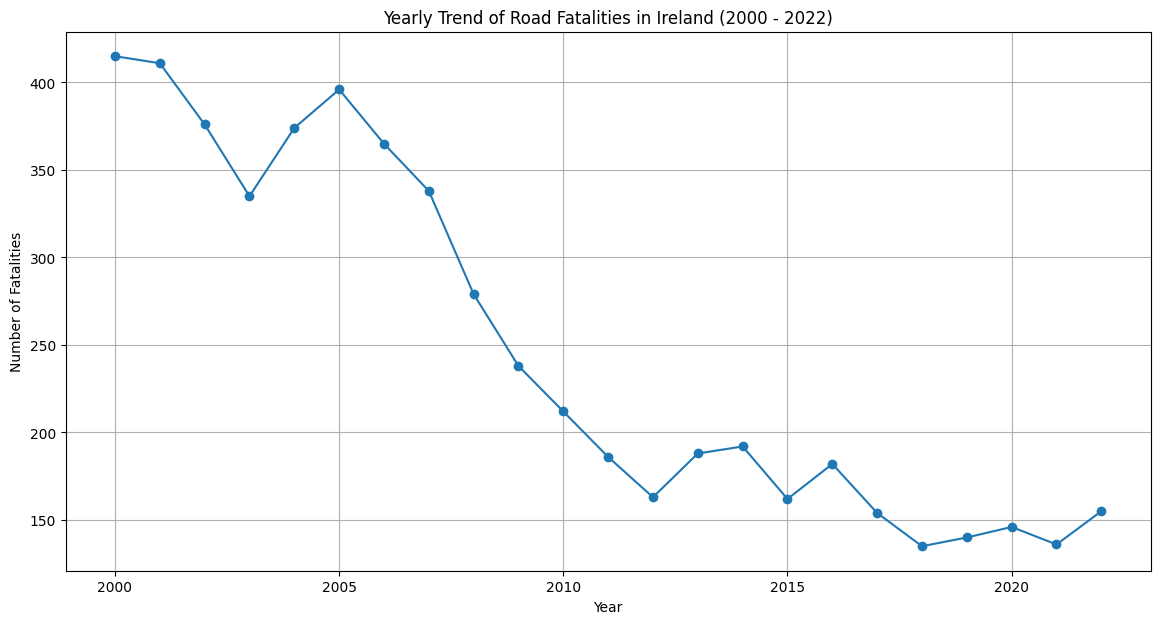

In [243]:

# Selecting only the 'Year' and 'Road Fatality Count' columns for plotting
annual_road_fatalities = annual_road_fatalities[['Year', 'Road Fatality Count']].set_index('Year')

plt.figure(figsize=(14, 7))

# Giving a marker for each year
annual_road_fatalities['Road Fatality Count'].plot(kind='line', marker='o')

plt.title('Yearly Trend of Road Fatalities in Ireland (2000 - 2022)')
plt.xlabel('Year')
plt.ylabel('Number of Fatalities')
plt.grid(True)
plt.show()

In [244]:
annual_road_fatalities.describe()

,Road Fatality Count
count,23.000000
mean,246.869565
std,103.293626
min,135.000000
25%,158.500000
50%,192.000000
75%,351.500000
max,415.000000


In [245]:
sample_stats = annual_road_fatalities['Road Fatality Count'].describe()
sample_stats

count     23.000000
mean     246.869565
std      103.293626
min      135.000000
25%      158.500000
50%      192.000000
75%      351.500000
max      415.000000
Name: Road Fatality Count, dtype: float64

- Providing a statistical summary of yearly road fatalities.

In [246]:

annual_fatalities = road_fatalities_2000_to_2023[road_fatalities_2000_to_2023['Month'] == 'Annual Fatalities']

statistics = annual_fatalities['Road Fatality Count'].describe()

# Formatting for the output
print("Statistical Summary of Yearly Road Fatalities (2000 - 2023):")
print(f"Mean (Average): {statistics['mean']:.2f}")
print(f"Standard Deviation: {statistics['std']:.2f}")
print(f"Minimum: {statistics['min']}")
print(f"25th Percentile: {statistics['25%']}")
print(f"Median (50th Percentile): {statistics['50%']}")
print(f"75th Percentile: {statistics['75%']}")
print(f"Maximum: {statistics['max']}")


Statistical Summary of Yearly Road Fatalities (2000 - 2023):
Mean (Average): 246.87
Standard Deviation: 103.29
Minimum: 135.0
25th Percentile: 158.5
Median (50th Percentile): 192.0
75th Percentile: 351.5
Maximum: 415.0


### Specific Analysis of more Recent Road Fatalities

- Analyzing road fatalities post-2006 with visualizations and statistics.

In [247]:

# Including only rows with 'Annual Fatalities'
specific_road_fatalities = road_fatalities_2000_to_2023[(road_fatalities_2000_to_2023['Month'] == 'Annual Fatalities') & (road_fatalities_2000_to_2023['Year'] > 2006)]

specific_road_fatalities

,Month,Year,Road Fatality Count,Season
103,Annual Fatalities,2007,338.0,Annual
116,Annual Fatalities,2008,279.0,Annual
129,Annual Fatalities,2009,238.0,Annual
142,Annual Fatalities,2010,212.0,Annual
155,Annual Fatalities,2011,186.0,Annual
168,Annual Fatalities,2012,163.0,Annual
181,Annual Fatalities,2013,188.0,Annual
194,Annual Fatalities,2014,192.0,Annual
207,Annual Fatalities,2015,162.0,Annual
220,Annual Fatalities,2016,182.0,Annual


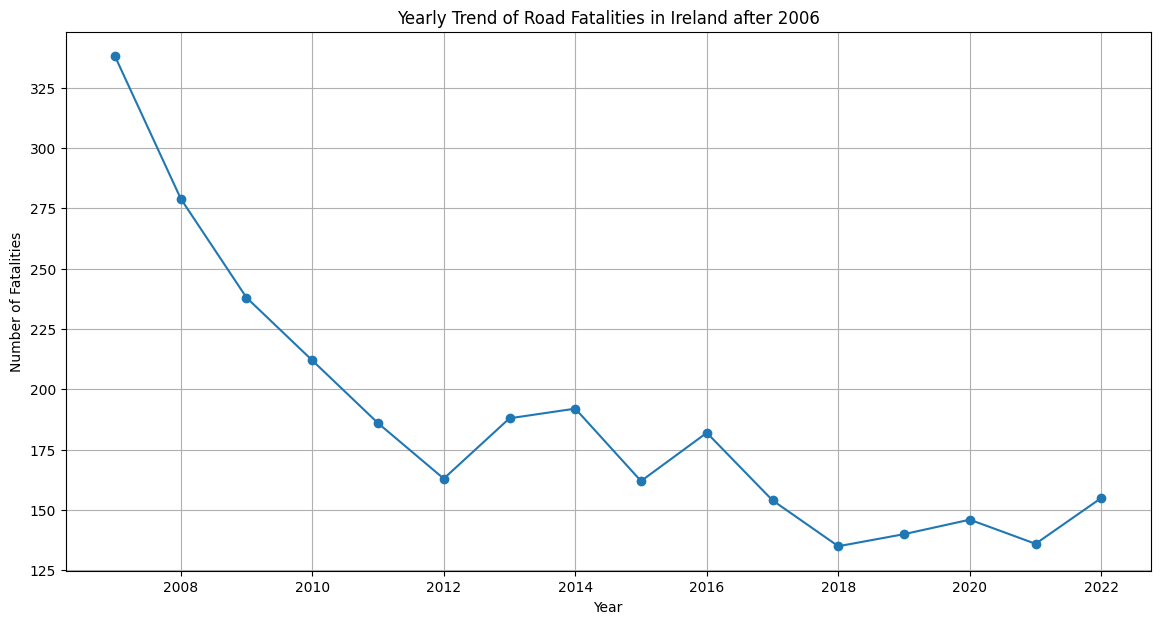

In [248]:

# Selecting only the 'Year' and 'Road Fatality Count' columns for plotting
specific_road_fatalities = specific_road_fatalities[['Year', 'Road Fatality Count']].set_index('Year')

plt.figure(figsize=(14, 7))

# Giving a marker for each year
specific_road_fatalities['Road Fatality Count'].plot(kind='line', marker='o')

plt.title('Yearly Trend of Road Fatalities in Ireland after 2006')
plt.xlabel('Year')
plt.ylabel('Number of Fatalities')
plt.grid(True)
plt.show()

In [249]:
statistics = specific_road_fatalities['Road Fatality Count'].describe()

print("Statistical Summary of Road Fatalities after 2006")
print(f"Mean (Average): {statistics['mean']:.2f}")
print(f"Standard Deviation: {statistics['std']:.2f}")
print(f"Minimum: {statistics['min']}")
print(f"25th Percentile: {statistics['25%']}")
print(f"Median (50th Percentile): {statistics['50%']}")
print(f"75th Percentile: {statistics['75%']}")
print(f"Maximum: {statistics['max']}")

Statistical Summary of Road Fatalities after 2006
Mean (Average): 187.88
Standard Deviation: 56.00
Minimum: 135.0
25th Percentile: 152.0
Median (50th Percentile): 172.5
75th Percentile: 197.0
Maximum: 338.0


### Seasonal Trend Visualization

- Grouping data by season and visualizing seasonal trends in road fatalities.

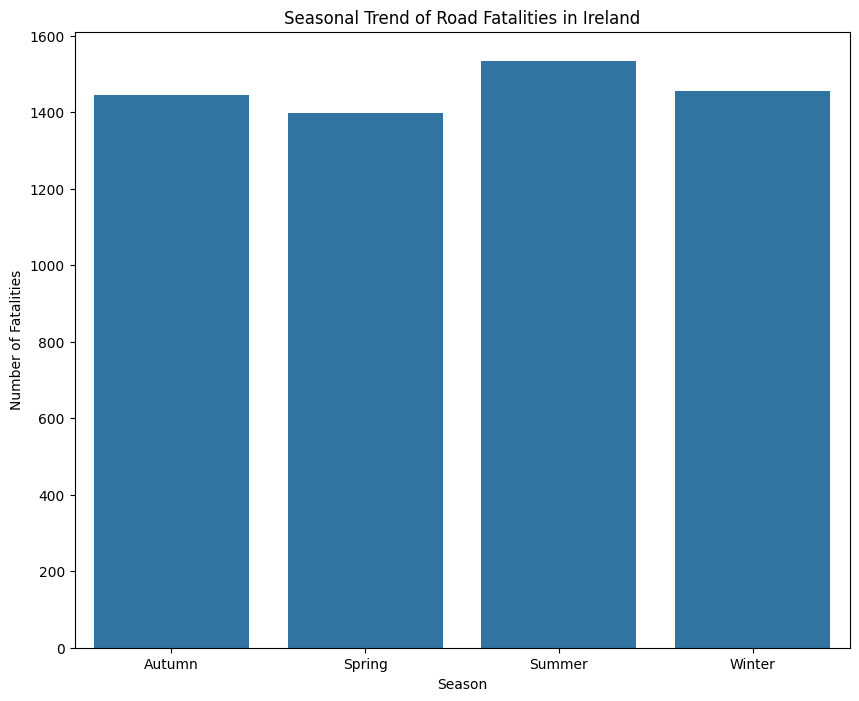

Seasonal Statistics of Road Fatalities in Ireland (2000 - 2023):
Mean (Average): 1459.00
Standard Deviation: 55.97
Minimum: 1399.0
25th Percentile: 1434.25
Median (50th Percentile): 1451.5
75th Percentile: 1476.25
Maximum: 1534.0


In [250]:
import seaborn as sns

filtered_data = road_fatalities_2000_to_2023[road_fatalities_2000_to_2023['Month'] != 'Annual Fatalities']

# Grouping the filtered data by Season and summing the fatalities
seasonal_fatalities = filtered_data.groupby('Season')['Road Fatality Count'].sum()


plt.figure(figsize=(10, 8))
sns.barplot(x=seasonal_fatalities.index, y=seasonal_fatalities.values)
plt.title('Seasonal Trend of Road Fatalities in Ireland')
plt.xlabel('Season')
plt.ylabel('Number of Fatalities')
plt.show()

statistics = seasonal_fatalities.describe()

# Formatting for the output
print("Seasonal Statistics of Road Fatalities in Ireland (2000 - 2023):")
print(f"Mean (Average): {statistics['mean']:.2f}")
print(f"Standard Deviation: {statistics['std']:.2f}")
print(f"Minimum: {statistics['min']}")
print(f"25th Percentile: {statistics['25%']}")
print(f"Median (50th Percentile): {statistics['50%']}")
print(f"75th Percentile: {statistics['75%']}")
print(f"Maximum: {statistics['max']}")

- Summarizing seasonal fatality statistics.

In [251]:
statistics = seasonal_fatalities.describe()

# Formatting for the output
print("Seasonal Statistics of Road Fatalities in Ireland (2000 - 2023):")
print(f"Mean (Average): {statistics['mean']:.2f}")
print(f"Standard Deviation: {statistics['std']:.2f}")
print(f"Minimum: {statistics['min']}")
print(f"25th Percentile: {statistics['25%']}")
print(f"Median (50th Percentile): {statistics['50%']}")
print(f"75th Percentile: {statistics['75%']}")
print(f"Maximum: {statistics['max']}")

Seasonal Statistics of Road Fatalities in Ireland (2000 - 2023):
Mean (Average): 1459.00
Standard Deviation: 55.97
Minimum: 1399.0
25th Percentile: 1434.25
Median (50th Percentile): 1451.5
75th Percentile: 1476.25
Maximum: 1534.0


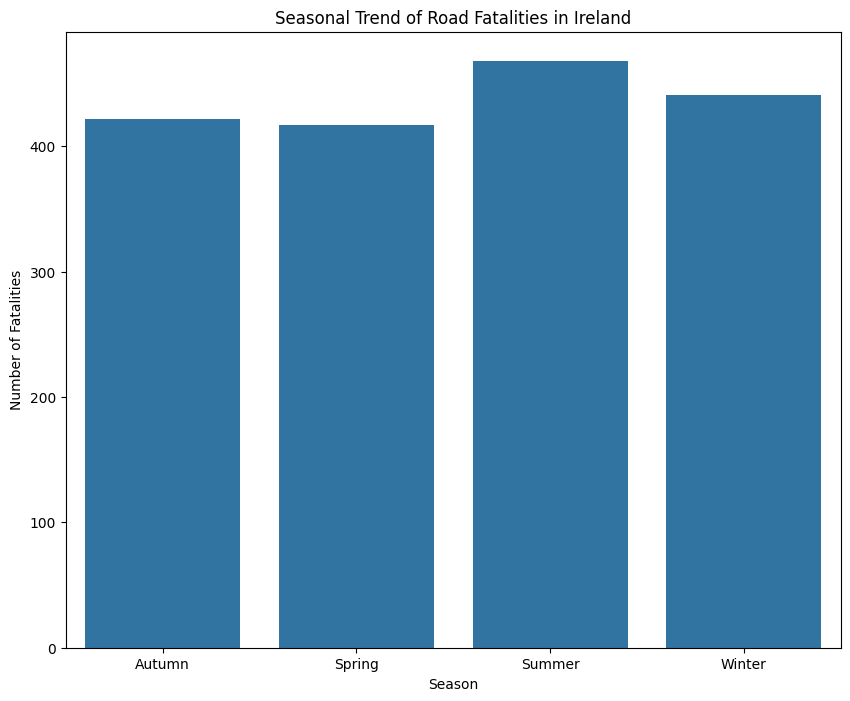

In [252]:
filtered_data = road_fatalities_2000_to_2023[(road_fatalities_2000_to_2023['Month'] != 'Annual Fatalities') & (road_fatalities_2000_to_2023['Year'] > 2012)]

# Grouping the filtered data by Season and summing the fatalities
seasonal_fatalities = filtered_data.groupby('Season')['Road Fatality Count'].sum()


plt.figure(figsize=(10, 8))
sns.barplot(x=seasonal_fatalities.index, y=seasonal_fatalities.values)
plt.title('Seasonal Trend of Road Fatalities in Ireland')
plt.xlabel('Season')
plt.ylabel('Number of Fatalities')
plt.show()

### Monthly Trend Visualization

In [253]:
# Filter out the 'Annual Fatalities' rows
filtered_data = road_fatalities_2000_to_2023[road_fatalities_2000_to_2023['Month'] != 'Annual Fatalities']

monthly_fatalities = filtered_data.groupby('Month')['Road Fatality Count'].sum()

C:\Users\c_bro\AppData\Local\Temp\ipykernel_7844\366824356.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_fatalities = filtered_data.groupby('Month')['Road Fatality Count'].sum()


In [254]:
print(monthly_fatalities.index.unique())

CategoricalIndex(['January', 'February', 'March', 'April', 'May', 'June',
                  'July', 'August', 'September', 'October', 'November',
                  'December', 'Annual Fatalities'],
                 categories=['January', 'February', 'March', 'April', ..., 'October', 'November', 'December', 'Annual Fatalities'], ordered=True, dtype='category', name='Month')


In [255]:

print(filtered_data['Month'].unique())

monthly_fatalities = filtered_data.groupby('Month')['Road Fatality Count'].sum()

print(monthly_fatalities.index.unique())


['January', 'February', 'March', 'April', 'May', ..., 'August', 'September', 'October', 'November', 'December']
Length: 12
Categories (13, object): ['January' < 'February' < 'March' < 'April' ... 'October' < 'November' < 'December' < 'Annual Fatalities']
CategoricalIndex(['January', 'February', 'March', 'April', 'May', 'June',
                  'July', 'August', 'September', 'October', 'November',
                  'December', 'Annual Fatalities'],
                 categories=['January', 'February', 'March', 'April', ..., 'October', 'November', 'December', 'Annual Fatalities'], ordered=True, dtype='category', name='Month')


C:\Users\c_bro\AppData\Local\Temp\ipykernel_7844\4255565276.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_fatalities = filtered_data.groupby('Month')['Road Fatality Count'].sum()


In [256]:
filtered_data['Month'] = filtered_data['Month'].cat.remove_categories(['Annual Fatalities'])
monthly_fatalities = filtered_data.groupby('Month')['Road Fatality Count'].sum()


C:\Users\c_bro\AppData\Local\Temp\ipykernel_7844\87328334.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Month'] = filtered_data['Month'].cat.remove_categories(['Annual Fatalities'])
C:\Users\c_bro\AppData\Local\Temp\ipykernel_7844\87328334.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_fatalities = filtered_data.groupby('Month')['Road Fatality Count'].sum()


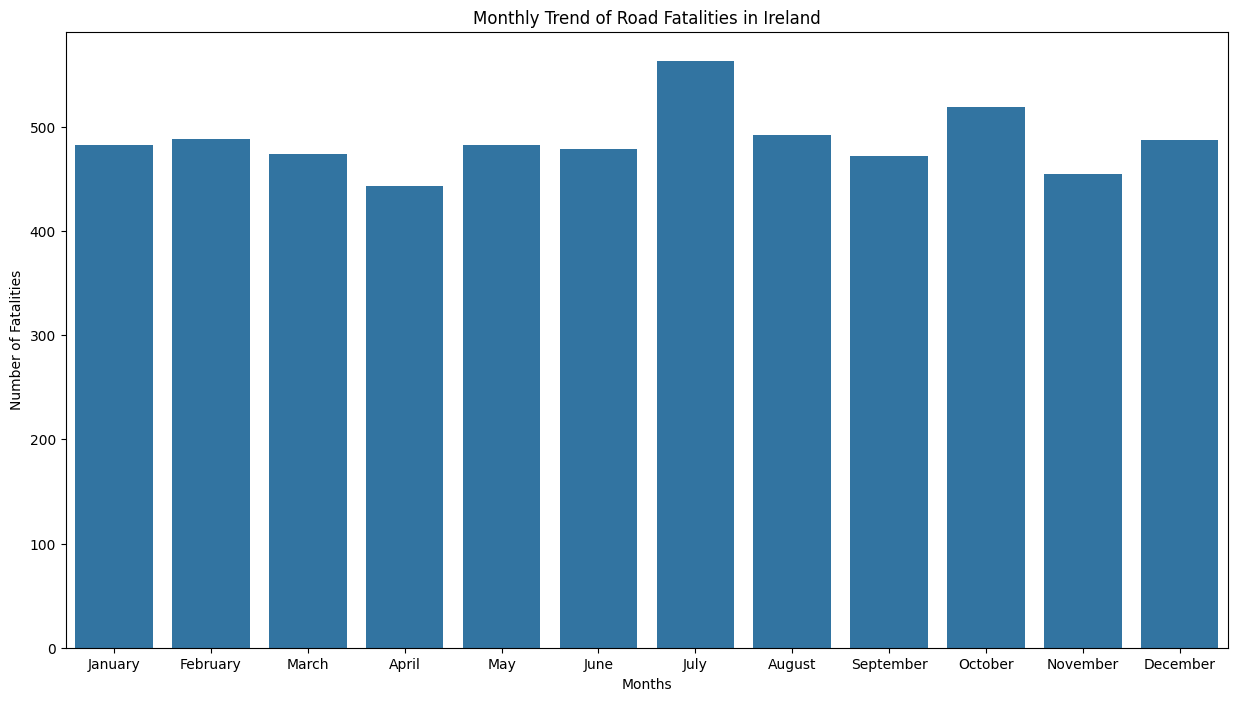

In [257]:
plt.figure(figsize=(15, 8))
sns.barplot(x=monthly_fatalities.index, y=monthly_fatalities.values)
plt.title('Monthly Trend of Road Fatalities in Ireland')
plt.xlabel('Months')
plt.ylabel('Number of Fatalities')
plt.show()

### The Model

#### Linear Regression Model

In [258]:
road_fatalities_2000_to_2023

,Month,Year,Road Fatality Count,Season
0,January,2000,32.0,Winter
1,February,2000,41.0,Winter
2,March,2000,23.0,Spring
3,April,2000,42.0,Spring
4,May,2000,29.0,Spring
5,June,2000,30.0,Summer
6,July,2000,39.0,Summer
7,August,2000,32.0,Summer
8,September,2000,39.0,Autumn
9,October,2000,40.0,Autumn


In [259]:
# Exclude 'Annual Fatalities'
model_data = road_fatalities_2000_to_2023[road_fatalities_2000_to_2023['Month'] != 'Annual Fatalities']

In [260]:
month_dummies = pd.get_dummies(model_data['Month'], prefix='Month')
season_dummies = pd.get_dummies(model_data['Season'], prefix='Season')

In [261]:
month_dummies

,Month_January,Month_February,Month_March,Month_April,Month_May,Month_June,Month_July,Month_August,Month_September,Month_October,Month_November,Month_December,Month_Annual Fatalities
0,True,False,False,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,False,False,False
2,False,False,True,False,False,False,False,False,False,False,False,False,False
3,False,False,False,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,True,False,False,False,False,False,False,False,False
5,False,False,False,False,False,True,False,False,False,False,False,False,False
6,False,False,False,False,False,False,True,False,False,False,False,False,False
7,False,False,False,False,False,False,False,True,False,False,False,False,False
8,False,False,False,False,False,False,False,False,True,False,False,False,False
9,False,False,False,False,False,False,False,False,False,True,False,False,False


In [262]:
season_dummies

,Season_Autumn,Season_Spring,Season_Summer,Season_Winter
0,False,False,False,True
1,False,False,False,True
2,False,True,False,False
3,False,True,False,False
4,False,True,False,False
5,False,False,True,False
6,False,False,True,False
7,False,False,True,False
8,True,False,False,False
9,True,False,False,False


In [263]:
modelDataframe = model_data.copy()


In [264]:
road_fatalities_with_dummies = pd.concat([modelDataframe, month_dummies, season_dummies], axis=1)

In [265]:
road_fatalities_with_dummies

,Month,Year,Road Fatality Count,Season,Month_January,Month_February,Month_March,Month_April,Month_May,Month_June,...,Month_August,Month_September,Month_October,Month_November,Month_December,Month_Annual Fatalities,Season_Autumn,Season_Spring,Season_Summer,Season_Winter
0,January,2000,32.0,Winter,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,February,2000,41.0,Winter,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,March,2000,23.0,Spring,False,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,April,2000,42.0,Spring,False,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
4,May,2000,29.0,Spring,False,False,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
5,June,2000,30.0,Summer,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,True,False
6,July,2000,39.0,Summer,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
7,August,2000,32.0,Summer,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,True,False
8,September,2000,39.0,Autumn,False,False,False,False,False,False,...,False,True,False,False,False,False,True,False,False,False
9,October,2000,40.0,Autumn,False,False,False,False,False,False,...,False,False,True,False,False,False,True,False,False,False


#### Selecting features and target variable

In [266]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model_X = road_fatalities_with_dummies.drop(['Road Fatality Count', 'Month', 'Season'], axis=1)  # All columns except target and original Month/Season
model_y = road_fatalities_with_dummies['Road Fatality Count']

In [267]:
model_X

,Year,Month_January,Month_February,Month_March,Month_April,Month_May,Month_June,Month_July,Month_August,Month_September,Month_October,Month_November,Month_December,Month_Annual Fatalities,Season_Autumn,Season_Spring,Season_Summer,Season_Winter
0,2000,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1,2000,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
2,2000,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False
3,2000,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False
4,2000,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False
5,2000,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False
6,2000,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False
7,2000,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False
8,2000,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False
9,2000,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False


In [268]:
model_y

0      32.0
1      41.0
2      23.0
3      42.0
4      29.0
5      30.0
6      39.0
7      32.0
8      39.0
9      40.0
10     36.0
       ... 
297    15.0
299    18.0
300    13.0
301    12.0
302    11.0
303    20.0
304    10.0
305    17.0
306    26.0
307     9.0
308    22.0
Name: Road Fatality Count, Length: 286, dtype: float64

#### Splitting the data into training and testing sets

In [269]:
X_train, X_test, y_train, y_test = train_test_split(model_X, model_y, test_size=0.2, random_state=0)

### Training the Linear Regression model

In [270]:
road_fatalities_model = LinearRegression()
road_fatalities_model.fit(X_train, y_train)

LinearRegression()

### Predicting and evaluating the model

In [271]:
from math import sqrt

prediction = road_fatalities_model.predict(X_test)
root_mean_squared_error = sqrt(mean_squared_error(y_test, prediction))

# Output the model performance
print("Root Mean Squared Error:", root_mean_squared_error)

Root Mean Squared Error: 6.2668586698080215


In [272]:
# Finding the minimum value of Road Fatality Count
min_fatalities = model_data['Road Fatality Count'].min()
min_fatalities

3.0

In [273]:
# Finding the maximum value of Road Fatality Count
max_fatalities = model_data['Road Fatality Count'].max()
print(f"Maximum Road Fatalities: {max_fatalities}")

Maximum Road Fatalities: 44.0


A Root Mean Squared Error of 6.2668 in the context of the road fatalities data, with a minimum value of 3 and a maximum of 44 suggests that the average error made by the model in predicting road fatalities is about 6 fatalities per prediction.

Since the RMSE is not close to the minimum value and is a significant portion of the range, it indicates moderate prediction accuracy. While not highly accurate, the model seems to have a reasonable predictive capability.

In the context of road safety, even a small number of fatalities is significant. Therefore, while an RMSE of 6 might seem small in other contexts, in road safety, this level of error can be quite impactful.

### Making predictions using test sets

In [274]:
# Making predictions on the test set
test_predictions = road_fatalities_model.predict(X_test)

# Comparing the first few predictions with actual values
comparisons = pd.DataFrame({'Actual Fatalities': y_test, 'Predicted Fatalities': test_predictions})

comparisons


,Actual Fatalities,Predicted Fatalities
59,35.0,28.077695
196,13.0,15.803267
99,28.0,22.903621
224,7.0,13.501007
203,16.0,14.184910
48,34.0,30.304867
120,20.0,22.219718
258,15.0,11.817534
16,22.0,30.938430
23,41.0,30.752293


### Visualization between Actual data and Predicted data

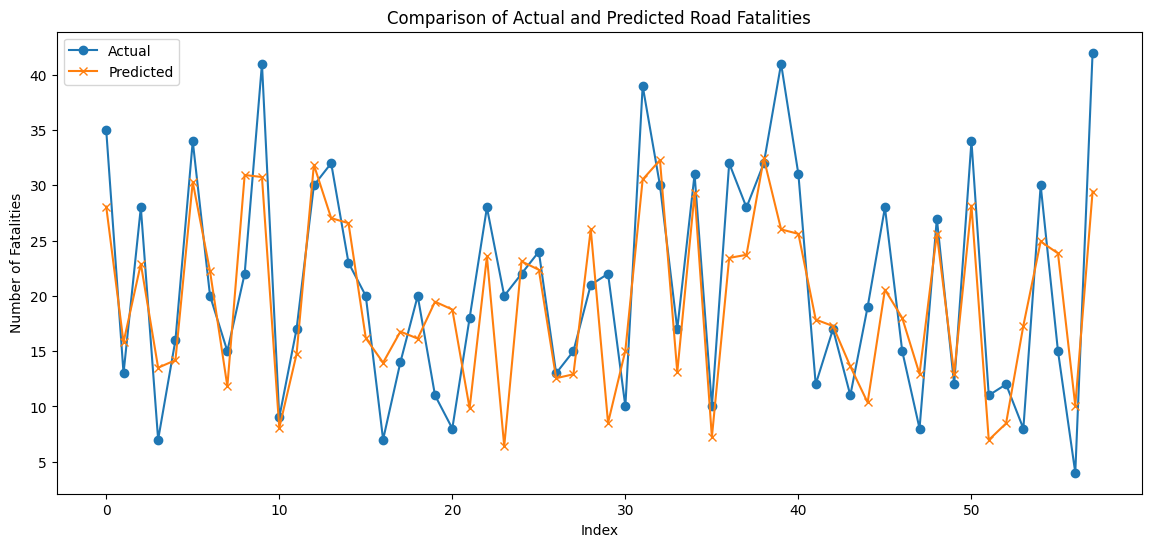

In [275]:

# Plotting actual vs predicted values
plt.figure(figsize=(14, 6))
plt.plot(comparisons['Actual Fatalities'].reset_index(drop=True), label='Actual', marker='o')
plt.plot(comparisons['Predicted Fatalities'].reset_index(drop=True), label='Predicted', marker='x')
plt.title('Comparison of Actual and Predicted Road Fatalities')
plt.xlabel('Index')
plt.ylabel('Number of Fatalities')
plt.legend()
plt.show()


### Creating a new data point

In [276]:
road_fatalities_october_2023 = road_fatalities_2000_to_2023[(road_fatalities_2000_to_2023['Month'] == 'October') & (road_fatalities_2000_to_2023['Year'] == 2023)]
road_fatalities_october_2023

,Month,Year,Road Fatality Count,Season
308,October,2023,22.0,Autumn


In [277]:
october_2023_fatalities = road_fatalities_october_2023['Road Fatality Count'].sum()
october_2023_fatalities

22.0

In [278]:
# Creating a new data point
# This is a hypothetical example
november_2023 = pd.DataFrame({
    'Year': 2023, 'Month_January': [0], 'Month_February': [0], 'Month_March': [0],
    'Month_April': [0], 'Month_May': [0], 'Month_June': [0],
    'Month_July': [0], 'Month_August': [0], 'Month_September': [0],
    'Month_October': [0], 'Month_November': [1], 'Month_December': [0], 'Month_Annual Fatalities': [0],
    'Season_Autumn': [1], 'Season_Spring': [0], 'Season_Summer': [0],'Season_Winter': [0]
    # Include any other features that were part of your model
})
november_2023

,Year,Month_January,Month_February,Month_March,Month_April,Month_May,Month_June,Month_July,Month_August,Month_September,Month_October,Month_November,Month_December,Month_Annual Fatalities,Season_Autumn,Season_Spring,Season_Summer,Season_Winter
0,2023,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0


In [279]:
# Making predictions on the new data point
new_prediction = road_fatalities_model.predict(november_2023)
print("Road fatalities for the month of October 2023:", october_2023_fatalities)
print("Predicted Fatalities for the month of November 2023:", new_prediction[0])

Road fatalities for the month of October 2023: 22.0
Predicted Fatalities for the month of November 2023: 6.775836162358246


The Linear Regression model doesn't seem to preduce accurate predictions on this dataset, another approach is required

### Using DateTime on new Linear Regression Model

In [295]:
model_data = road_fatalities_2000_to_2023[road_fatalities_2000_to_2023['Month'] != 'Annual Fatalities']
model_data['Date'] = pd.to_datetime(model_data['Month'].astype(str) + ' ' + model_data['Year'].astype(str))

copy_model_data = model_data.copy()

C:\Users\c_bro\AppData\Local\Temp\ipykernel_7844\2528009324.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  model_data['Date'] = pd.to_datetime(model_data['Month'].astype(str) + ' ' + model_data['Year'].astype(str))
C:\Users\c_bro\AppData\Local\Temp\ipykernel_7844\2528009324.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data['Date'] = pd.to_datetime(model_data['Month'].astype(str) + ' ' + model_data['Year'].astype(str))


In [281]:
model_data.drop(columns=['Month', 'Year'], inplace=True)

C:\Users\c_bro\AppData\Local\Temp\ipykernel_7844\1265904453.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data.drop(columns=['Month', 'Year'], inplace=True)


In [282]:
model_data

,Road Fatality Count,Season,Date
0,32.0,Winter,2000-01-01
1,41.0,Winter,2000-02-01
2,23.0,Spring,2000-03-01
3,42.0,Spring,2000-04-01
4,29.0,Spring,2000-05-01
5,30.0,Summer,2000-06-01
6,39.0,Summer,2000-07-01
7,32.0,Summer,2000-08-01
8,39.0,Autumn,2000-09-01
9,40.0,Autumn,2000-10-01


In [283]:
model_data.set_index('Date', inplace=True)


#### 'Date' is a datetime column which can be used as a feature

##### Convert the index (which is in datetime format) to ordinal numbers
##### This is done by mapping each date to ordinal (number of days since Jan 1 of year 1)
date_ordinals = model_data.index.map(pd.Timestamp.toordinal)

##### Reshape the data to make it suitable for the model
##### Linear regression in scikit-learn expects input features in a specific format: 
##### an array of samples
X = date_ordinals.values.reshape(-1, 1)

In [284]:
date_ordinals = model_data.index.map(pd.Timestamp.toordinal)
date_ordinals

Index([730120, 730151, 730180, 730211, 730241, 730272, 730302, 730333, 730364,
       730394,
       ...
       738521, 738552, 738580, 738611, 738641, 738672, 738702, 738733, 738764,
       738794],
      dtype='int64', name='Date', length=286)

In [285]:
X = date_ordinals.values.reshape(-1, 1)

In [286]:
y = model_data['Road Fatality Count']  # Target variable

In [287]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Create and fit the model

In [288]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

#### New Predictions

In [ ]:
# Making predictions on the test set
test_predictions = model.predict(X_test)

# Comparing the first few predictions with actual values
comparisons = pd.DataFrame({'Actual Fatalities': y_test, 'Predicted Fatalities': test_predictions})

comparisons

In [293]:
from math import sqrt

rmse = sqrt(mean_squared_error(y_test, test_predictions))

# Output the model performance
print("Root Mean Squared Error:", rmse)

Root Mean Squared Error: 5.971906539689927


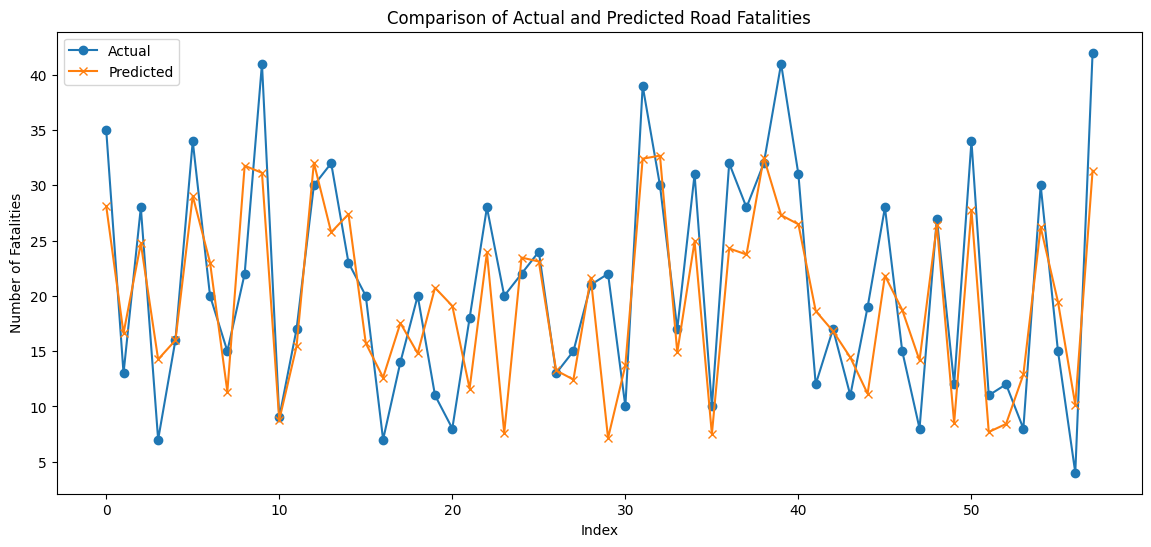

In [294]:
plt.figure(figsize=(14, 6))
plt.plot(comparisons['Actual Fatalities'].reset_index(drop=True), label='Actual', marker='o')
plt.plot(comparisons['Predicted Fatalities'].reset_index(drop=True), label='Predicted', marker='x')
plt.title('Comparison of Actual and Predicted Road Fatalities')
plt.xlabel('Index')
plt.ylabel('Number of Fatalities')
plt.legend()
plt.show()

## More Visualizations

### Heatmap of road fatalities by month and year

In [296]:
copy_model_data

,Month,Year,Road Fatality Count,Season,Date
0,January,2000,32.0,Winter,2000-01-01
1,February,2000,41.0,Winter,2000-02-01
2,March,2000,23.0,Spring,2000-03-01
3,April,2000,42.0,Spring,2000-04-01
4,May,2000,29.0,Spring,2000-05-01
5,June,2000,30.0,Summer,2000-06-01
6,July,2000,39.0,Summer,2000-07-01
7,August,2000,32.0,Summer,2000-08-01
8,September,2000,39.0,Autumn,2000-09-01
9,October,2000,40.0,Autumn,2000-10-01


In [298]:
heatmap_data = copy_model_data.pivot_table(index='Year', columns='Month', values='Road Fatality Count', aggfunc='sum')
heatmap_data

Month,January,February,March,April,May,June,July,August,September,October,November,December,Annual Fatalities
Year,,,,,,,,,,,,,
2000,32.0,41.0,23.0,42.0,29.0,30.0,39.0,32.0,39.0,40.0,36.0,32.0,0.0
2001,30.0,38.0,31.0,22.0,40.0,24.0,41.0,34.0,42.0,32.0,41.0,36.0,0.0
2002,35.0,33.0,34.0,32.0,20.0,34.0,42.0,35.0,36.0,31.0,23.0,21.0,0.0
2003,20.0,21.0,33.0,23.0,38.0,37.0,32.0,26.0,20.0,34.0,30.0,21.0,0.0
2004,32.0,36.0,25.0,27.0,26.0,36.0,38.0,35.0,34.0,22.0,29.0,34.0,0.0
2005,33.0,37.0,26.0,23.0,41.0,22.0,41.0,24.0,31.0,44.0,34.0,40.0,0.0
2006,40.0,31.0,27.0,37.0,30.0,32.0,38.0,17.0,23.0,32.0,27.0,31.0,0.0
2007,22.0,25.0,34.0,30.0,24.0,29.0,31.0,28.0,28.0,27.0,23.0,37.0,0.0
2008,25.0,32.0,20.0,19.0,19.0,28.0,26.0,28.0,19.0,22.0,22.0,19.0,0.0


In [299]:
heatmap_data.drop(columns=['Annual Fatalities'], inplace=True)
heatmap_data

Month,January,February,March,April,May,June,July,August,September,October,November,December
Year,,,,,,,,,,,,
2000,32.0,41.0,23.0,42.0,29.0,30.0,39.0,32.0,39.0,40.0,36.0,32.0
2001,30.0,38.0,31.0,22.0,40.0,24.0,41.0,34.0,42.0,32.0,41.0,36.0
2002,35.0,33.0,34.0,32.0,20.0,34.0,42.0,35.0,36.0,31.0,23.0,21.0
2003,20.0,21.0,33.0,23.0,38.0,37.0,32.0,26.0,20.0,34.0,30.0,21.0
2004,32.0,36.0,25.0,27.0,26.0,36.0,38.0,35.0,34.0,22.0,29.0,34.0
2005,33.0,37.0,26.0,23.0,41.0,22.0,41.0,24.0,31.0,44.0,34.0,40.0
2006,40.0,31.0,27.0,37.0,30.0,32.0,38.0,17.0,23.0,32.0,27.0,31.0
2007,22.0,25.0,34.0,30.0,24.0,29.0,31.0,28.0,28.0,27.0,23.0,37.0
2008,25.0,32.0,20.0,19.0,19.0,28.0,26.0,28.0,19.0,22.0,22.0,19.0


#### Create the heatmap


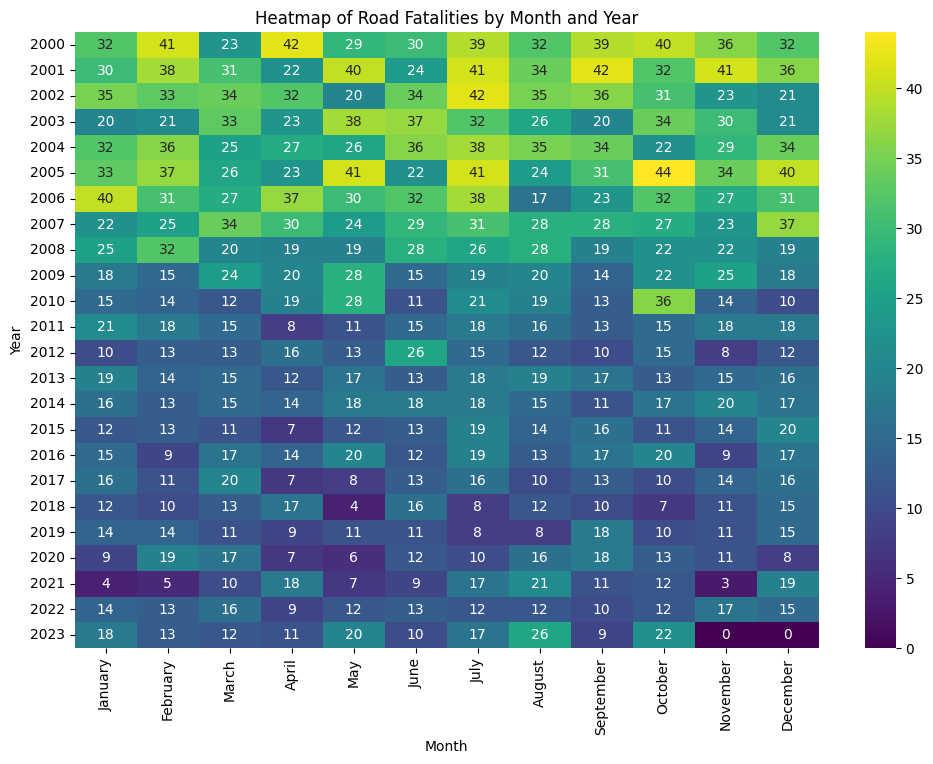

In [300]:
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, cmap='viridis', fmt='g')  # 'fmt' is the string formatting code
plt.title('Heatmap of Road Fatalities by Month and Year')
plt.ylabel('Year')
plt.xlabel('Month')
plt.show()

### Histogram of road fatalities

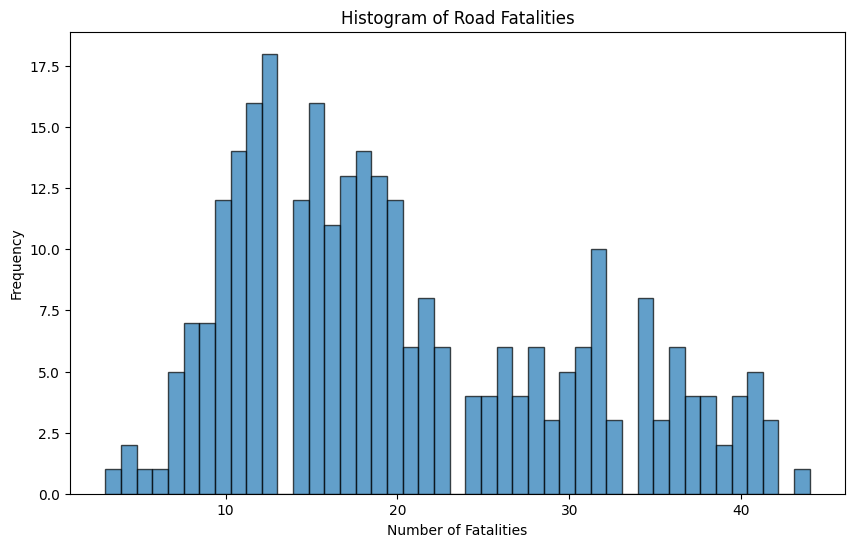

In [304]:
plt.figure(figsize=(10, 6))
plt.hist(copy_model_data['Road Fatality Count'], bins=45, edgecolor='black', alpha=0.7)
plt.title('Histogram of Road Fatalities')
plt.xlabel('Number of Fatalities')
plt.ylabel('Frequency')
plt.show()